# BREAKING BAD

#### TV Series 2008-2013 Crime/Drama/Thriller

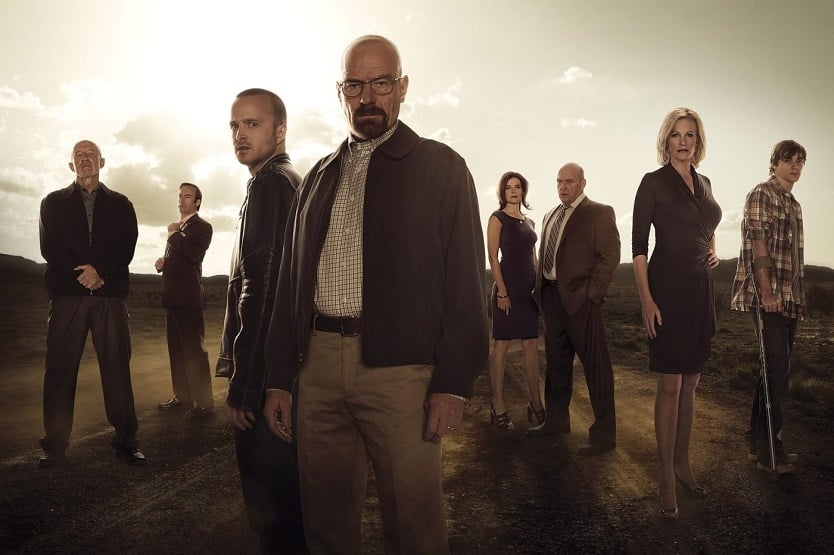

In [1]:
from IPython.display import Image

Image(filename='C://Users//Hande//Desktop//RR_8//amc.jpg')

Breaking Bad is an American crime drama television series created and produced by Vince Gilligan for AMC. Set and filmed in Albuquerque, New Mexico, the series follows Walter White (Bryan Cranston), an underpaid, dispirited high-school chemistry teacher struggling with a recent diagnosis of stage-three lung cancer. White turns to a life of crime and partners with a former student, Jesse Pinkman (Aaron Paul), to produce and distribute methamphetamine to secure his family's financial future before he dies, while navigating the dangers of the criminal underworld. Breaking Bad premiered on AMC on January 20, 2008, and concluded on September 29, 2013, after five seasons consisting of 62 episodes.

Among the show's co-stars are Anna Gunn and RJ Mitte as Walter's wife Skyler and son Walter Jr., and Betsy Brandt and Dean Norris as Skyler's sister Marie Schrader and her husband Hank, a DEA agent. Others include Bob Odenkirk as Walter's and Jesse's lawyer Saul Goodman, Jonathan Banks as private investigator and fixer Mike Ehrmantraut, and Giancarlo Esposito as drug kingpin Gus Fring. The final season introduces Jesse Plemons as the criminally ambitious Todd Alquist, and Laura Fraser as Lydia Rodarte-Quayle, a cunning business executive.

Breaking Bad's first season received generally positive reviews, while the subsequent seasons received unanimous critical acclaim, with praise for the performances, direction, cinematography, writing, story, and character development. Since its conclusion, the show has been lauded by critics as one of the greatest television series of all time. It has also developed a cult following. The show had fair viewership in its first three seasons, but the fourth and fifth seasons saw a moderate rise in viewership when it was made available on Netflix just before the fourth season premiere. Viewership increased exponentially upon the premiere of the second half of the fifth season in 2013. By the time that the series finale aired, it was among the most-watched cable shows on American television. The show received numerous awards, including 16 Primetime Emmy Awards, eight Satellite Awards, two Golden Globe Awards, two Peabody Awards, two Critics' Choice Awards, and four Television Critics Association Awards. Cranston won the Primetime Emmy Award for Outstanding Lead Actor in a Drama Series four times, while Aaron Paul won the Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series three times; Anna Gunn won the Primetime Emmy Award for Outstanding Supporting Actress in a Drama Series twice. In 2013, Breaking Bad entered the Guinness World Records as the most critically acclaimed TV show of all time. In 2023, Breaking Bad was ranked as the best TV series in the last 25 years by critics in a poll conveyed by Rotten Tomatoes.

The series gave rise to the larger Breaking Bad franchise. Better Call Saul, a prequel series featuring Odenkirk, Banks, and Esposito reprising their Breaking Bad roles, as well as many others in guest and recurring appearances, debuted on AMC on February 8, 2015, and concluded on August 15, 2022. A sequel film, El Camino: A Breaking Bad Movie, starring Paul was released on Netflix and in theaters on October 11, 2019.

In [13]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

data = {
    'Aspect': ['Genre', 'Created by', 'Starring', 'Composer', 'Country of origin', 'Original languages', 'No. of seasons', 'No. of episodes'],
    'Details': [
        'Crime drama, Serial drama, Thriller, Neo-Western, Black comedy, Tragedy',
        'Vince Gilligan',
        'Bryan Cranston, Anna Gunn, Aaron Paul, Dean Norris, Betsy Brandt, RJ Mitte, Giancarlo Esposito, Bob Odenkirk, Jonathan Banks, Laura Fraser, Jesse Plemons',
        'Dave Porter',
        'United States',
        'English, Spanish',
        '5',
        '62 (list of episodes)'
    ]
}

df = pd.DataFrame(data)

df.style.hide_index()


C:\Users\Hande\AppData\Local\Temp\ipykernel_7972\3417152947.py:21: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.style.hide_index()


Aspect,Details
Genre,"Crime drama, Serial drama, Thriller, Neo-Western, Black comedy, Tragedy"
Created by,Vince Gilligan
Starring,"Bryan Cranston, Anna Gunn, Aaron Paul, Dean Norris, Betsy Brandt, RJ Mitte, Giancarlo Esposito, Bob Odenkirk, Jonathan Banks, Laura Fraser, Jesse Plemons"
Composer,Dave Porter
Country of origin,United States
Original languages,"English, Spanish"
No. of seasons,5
No. of episodes,62 (list of episodes)


#### Premise
The show takes place in Albuquerque, New Mexico, between 2008 and 2010. Breaking Bad follows Walter White, a struggling, frustrated high school chemistry teacher who transforms into a ruthless kingpin in the local methamphetamine drug trade, driven to provide for his family financially after being diagnosed with inoperable lung cancer. Initially making only small batches of meth with his former student Jesse Pinkman in a rolling meth lab, Walter and Jesse eventually expand to make larger batches of an extremely pure, blue meth which creates high demand. Walter takes on the name "Heisenberg" to mask his identity. Because of his drug-related activities, Walter eventually finds himself at odds with his family, the Drug Enforcement Administration (DEA) through his brother-in-law Hank Schrader, the local gangs, and the Mexican drug cartels (including their regional distributors), putting him and his family's lives at risk.

#### Main Characters

*Walter White*

Bryan Cranston as Walter White, a high-school chemistry teacher who, shortly after his 50th birthday, is diagnosed with Stage III lung cancer and turns to making meth to secure his family's finances. As his shady business progresses, Walter gains a notorious reputation under the alias of Heisenberg. Cranston stated that, though he enjoyed doing comedy, he decided he should really focus on doing something else. But I think any good drama worth its weight always has a sprinkling of comedy in it, because you can ease the tension to an audience when it's necessary, and then build it back up again. Walt White has no clue he's occasionally funny, but as an actor, I recognize when there are comedic moments and opportunities.

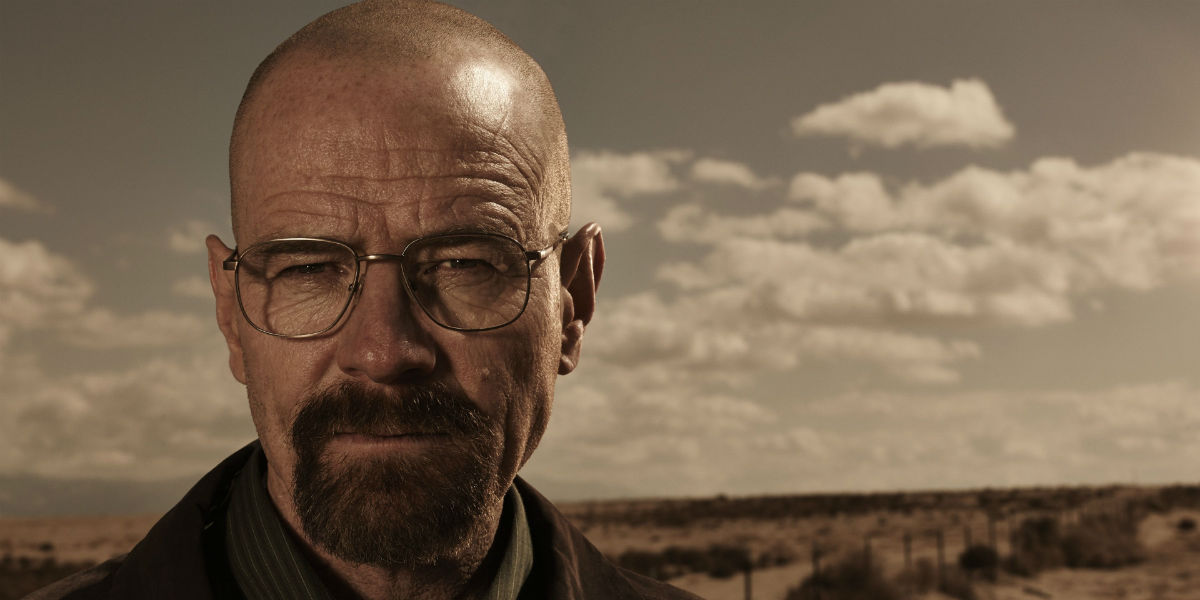

*Skyler White*

Anna Gunn as Skyler White, Walter's wife who was pregnant with their second child before his diagnosis and who becomes increasingly suspicious of her husband after he begins behaving in unfamiliar ways. Gunn sees Skyler as grounded, tough, smart and driven. Gunn sees Skyler's stalled writing career as her biggest dream, saying, 'I think she really deep down yearns to be an artist and to be creative and productive.'

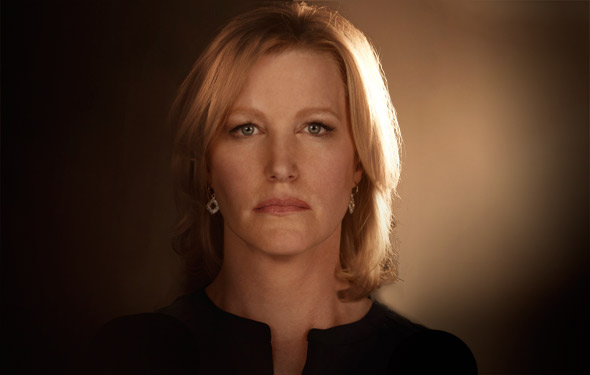

*Jesse Pinkman*

Aaron Paul as Jesse Pinkman, Walter's cooking partner and former student. Paul sees Jesse as a funny kid. He's just this lost soul – I don't think he's a bad kid, he just got mixed in the wrong crowd. Paul elaborated on the character's background, saying, He doesn't come from an abusive, alcoholic background. But maybe he just didn't relate to his father, maybe his father was too strict and too proper for Jesse. Paul compared the character's relationship with Walt to The Odd Couple.

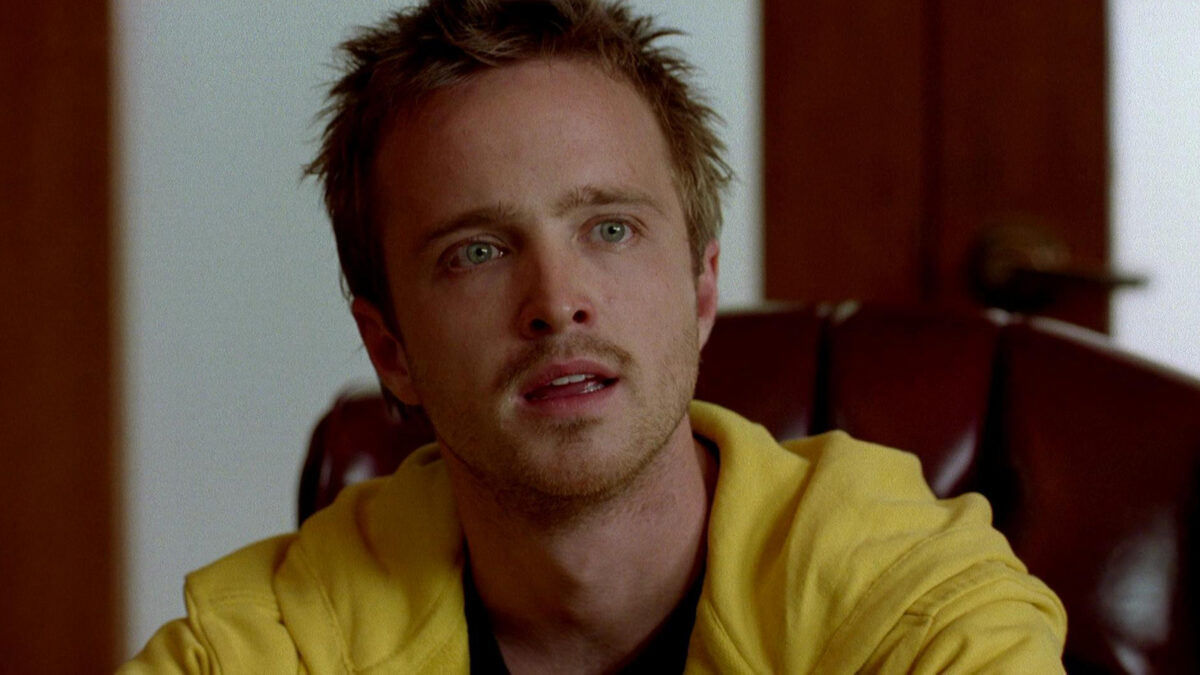

*Hank Schrader*

Dean Norris as Hank Schrader, Marie's husband, Walter and Skyler's brother-in-law and a DEA agent. At the beginning of the series, Hank was intended to be the comic relief.Betsy Brandt as Marie Schrader, Skyler's sister and Hank's kleptomaniac wife. Brandt described Marie as an unpleasant bitch, but also stated that there was more to her than that. I think we're seeing more of it now that she would be there for her family. But it's all about her.

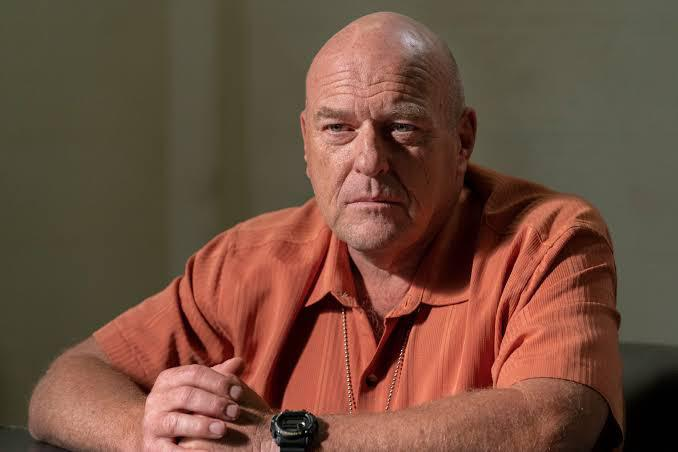

*Gus Fring*

Giancarlo Esposito as Gustavo 'Gus' Fring (seasons 3–4; guest season 2), a Chilean high-level drug distributor who has a cover as an owner of the fast-food chain Los Pollos Hermanos. Esposito stated that for the third season, he incorporated his yoga training in his performance. Gus is the coolest cucumber that ever walked the Earth. I think about Eddie Olmos way back in Miami Vice. He was like dead – he was hardly breathing. I thought, how is this guy just standing in this fire and doing nothing? Gus has totally allowed me that level of flexibility and relaxation – not because he has ultimate power and he knows he can take someone's life. He's just confident.

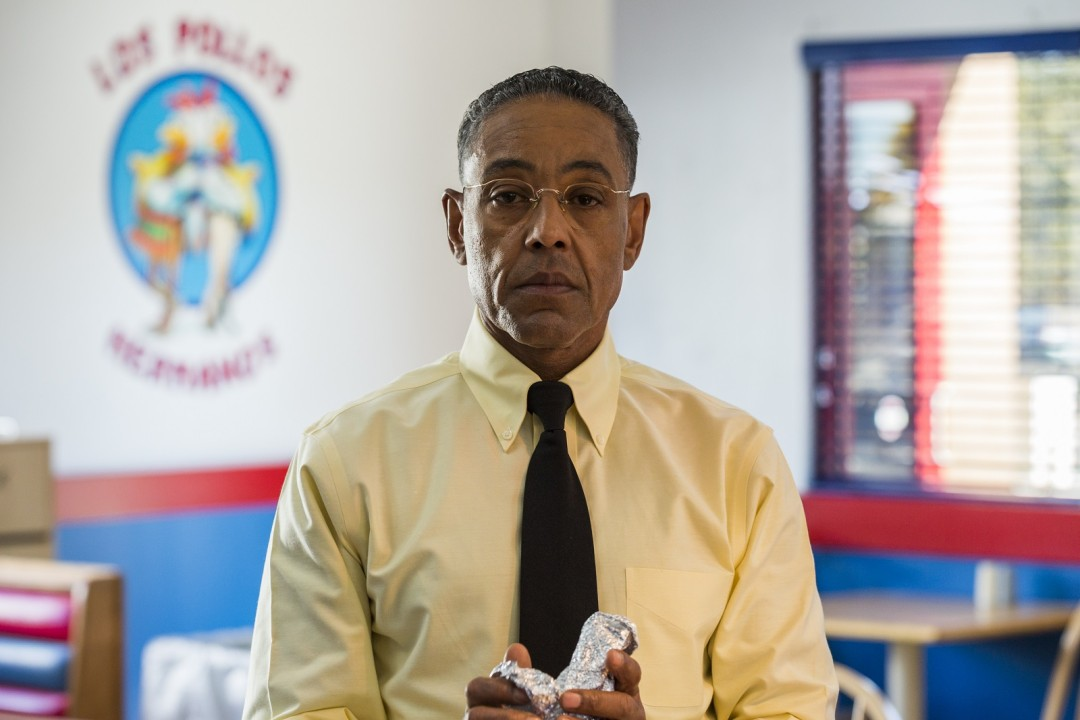

*Saul Goodman*

Bob Odenkirk as Saul Goodman (seasons 3–5; recurring season 2), a crooked strip mall lawyer who represents Walt and Jesse. Odenkirk drew inspiration for Goodman from film producer Robert Evans.I thought about Robert Evans because I've listened to The Kid Stays in the Picture on CD. He's constantly switching up his cadence and his delivery. He emphasizes interesting words. He has loads of attitude in almost every line that he says. So when I rehearse the scenes alone I do my impersonation of Robert Evans to find those moments and turns. Then I go out and I do Saul.

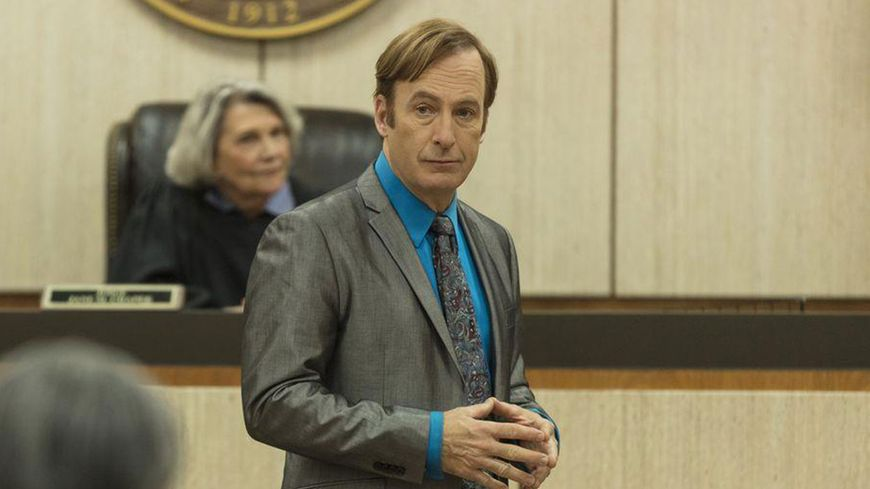

*Mike Ehrmantraut*

Jonathan Banks as Mike Ehrmantraut (seasons 3–5A; guest season 2), works for Gus as an all-purpose cleaner and hitman, and also works for Saul as a private investigator. The character of Mike has been compared to Harvey Keitel's Winston Wolf character in Pulp Fiction, which Banks says he is not trying to emulate: 'I immediately tried to put it out of my mind, quite honestly. His cleaner ain't my cleaner. But throughout this world, you would suspect there had been a great many cleaners, whether government-run or individual contractors.'

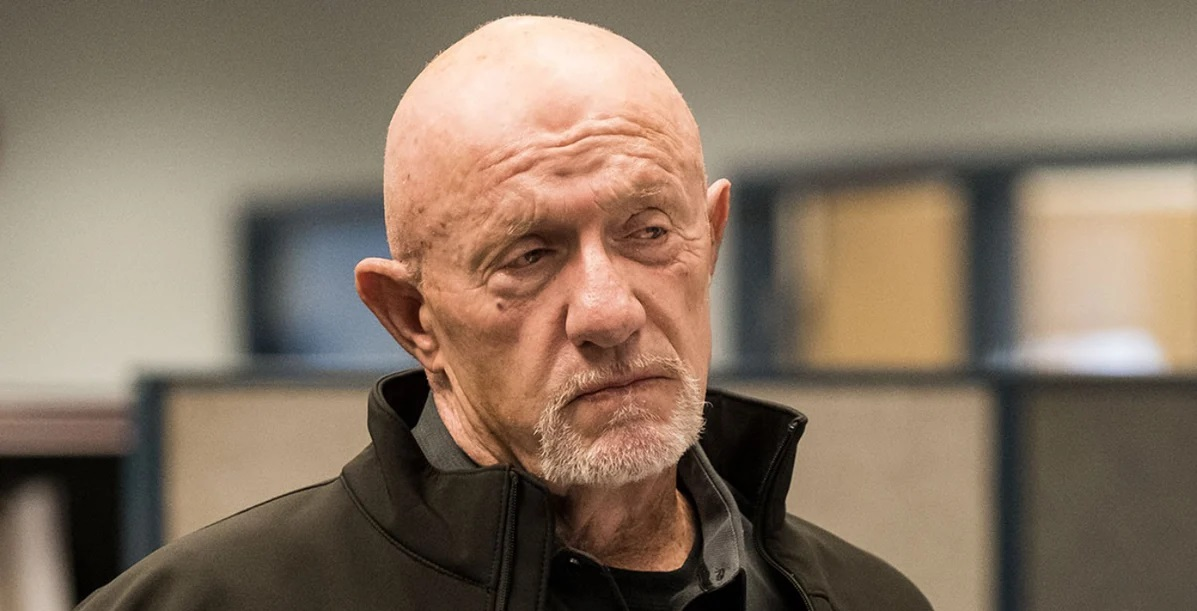

In [32]:
from IPython.display import Image, display, Markdown


characters_info = {
    "Walter White": {
        "description": "Bryan Cranston as Walter White, a high-school chemistry teacher who, shortly after his 50th birthday, is diagnosed with Stage III lung cancer and turns to making meth to secure his family's finances. As his shady business progresses, Walter gains a notorious reputation under the alias of Heisenberg. Cranston stated that, though he enjoyed doing comedy, he decided he should really focus on doing something else. But I think any good drama worth its weight always has a sprinkling of comedy in it, because you can ease the tension to an audience when it's necessary, and then build it back up again. Walt White has no clue he's occasionally funny, but as an actor, I recognize when there are comedic moments and opportunities.",
        "image_path": "C:/Users/Hande/Desktop/walter.jpg"
    },
    "Skyler White": {
        "description": "Anna Gunn as Skyler White, Walter's wife who was pregnant with their second child before his diagnosis and who becomes increasingly suspicious of her husband after he begins behaving in unfamiliar ways. Gunn sees Skyler as grounded, tough, smart and driven. Gunn sees Skyler's stalled writing career as her biggest dream, saying, 'I think she really deep down yearns to be an artist and to be creative and productive.'",
        "image_path": "C:/Users/Hande/Desktop/skyler.jpg"
    },
    "Jesse Pinkman": {
        "description": "Aaron Paul as Jesse Pinkman, Walter's cooking partner and former student. Paul sees Jesse as a funny kid. He's just this lost soul – I don't think he's a bad kid, he just got mixed in the wrong crowd. Paul elaborated on the character's background, saying, He doesn't come from an abusive, alcoholic background. But maybe he just didn't relate to his father, maybe his father was too strict and too proper for Jesse. Paul compared the character's relationship with Walt to The Odd Couple.",
        "image_path": "C:/Users/Hande/Desktop/jesse.jpg"
        
    },
    "Hank Schrader": {
        "description": "Dean Norris as Hank Schrader, Marie's husband, Walter and Skyler's brother-in-law and a DEA agent. At the beginning of the series, Hank was intended to be the comic relief.Betsy Brandt as Marie Schrader, Skyler's sister and Hank's kleptomaniac wife. Brandt described Marie as an unpleasant bitch, but also stated that there was more to her than that. I think we're seeing more of it now that she would be there for her family. But it's all about her.",
        "image_path": "C:/Users/Hande/Desktop/hank.jpg"
        
    },
    "Gus Fring": {
        "description": "Giancarlo Esposito as Gustavo 'Gus' Fring (seasons 3–4; guest season 2), a Chilean high-level drug distributor who has a cover as an owner of the fast-food chain Los Pollos Hermanos. Esposito stated that for the third season, he incorporated his yoga training in his performance. Gus is the coolest cucumber that ever walked the Earth. I think about Eddie Olmos way back in Miami Vice. He was like dead – he was hardly breathing. I thought, how is this guy just standing in this fire and doing nothing? Gus has totally allowed me that level of flexibility and relaxation – not because he has ultimate power and he knows he can take someone's life. He's just confident.",
        "image_path": "C:/Users/Hande/Desktop/gus.jpeg"
    },
    "Saul Goodman": {
        "description": "Bob Odenkirk as Saul Goodman (seasons 3–5; recurring season 2), a crooked strip mall lawyer who represents Walt and Jesse. Odenkirk drew inspiration for Goodman from film producer Robert Evans.I thought about Robert Evans because I've listened to The Kid Stays in the Picture on CD. He's constantly switching up his cadence and his delivery. He emphasizes interesting words. He has loads of attitude in almost every line that he says. So when I rehearse the scenes alone I do my impersonation of Robert Evans to find those moments and turns. Then I go out and I do Saul.",
        "image_path": "C:/Users/Hande/Desktop/saul.jpg"
    },

    "Mike Ehrmantraut": {
        "description": "Jonathan Banks as Mike Ehrmantraut (seasons 3–5A; guest season 2), works for Gus as an all-purpose cleaner and hitman, and also works for Saul as a private investigator. The character of Mike has been compared to Harvey Keitel's Winston Wolf character in Pulp Fiction, which Banks says he is not trying to emulate: 'I immediately tried to put it out of my mind, quite honestly. His cleaner ain't my cleaner. But throughout this world, you would suspect there had been a great many cleaners, whether government-run or individual contractors.'",
        "image_path": "C:/Users/Hande/Desktop/mike.jpg"
    }
    
}

# Loop through the characters and display their name in italic, description, and image
for name, info in characters_info.items():
    display(Markdown(f"*{name}*"))
    display(Markdown(info["description"]))
    display(Image(filename=info["image_path"]))


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
breaking_bad_data = pd.read_csv("C:/Users/Hande/Desktop/RR_8/data/breaking_bad.csv", encoding='ISO-8859-1')

breaking_bad_data['Date'] = pd.to_datetime(breaking_bad_data['Date'])

breaking_bad_data.head()

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,2008-01-20,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,2008-01-27,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,2008-02-10,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,2008-02-17,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,2008-02-24,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


<AxesSubplot:title={'center':'average Rating_IMDB by seasons'}, xlabel='Season'>

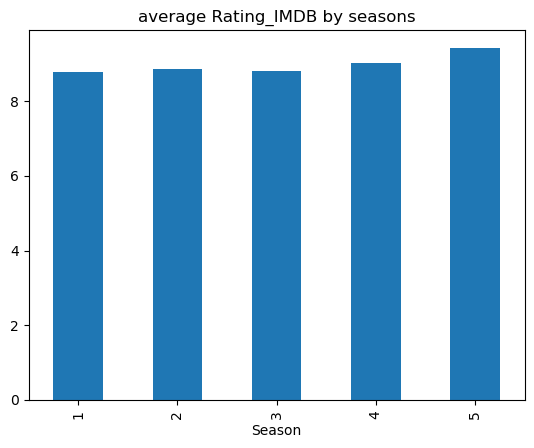

In [14]:
breaking_bad_data.groupby('Season')['Rating_IMDB'].mean().plot.bar(title='average Rating_IMDB by seasons')

<AxesSubplot:>

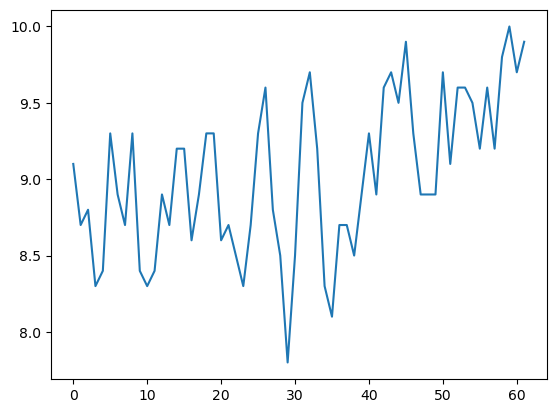

In [16]:
breaking_bad_data['Rating_IMDB'].plot()

<AxesSubplot:title={'center':'average vewers by seasons'}, xlabel='Season'>

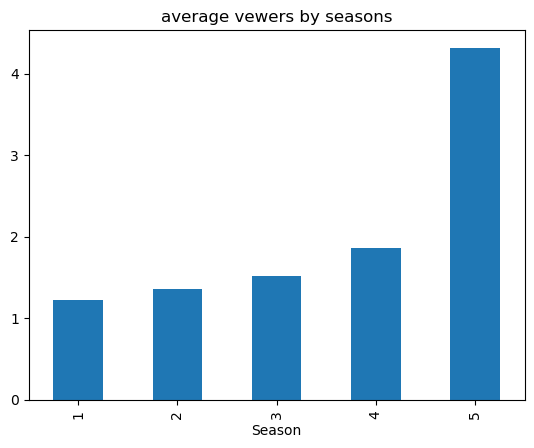

In [15]:
breaking_bad_data.groupby('Season')['U.S. viewers_million'].mean().plot.bar(title='average vewers by seasons')

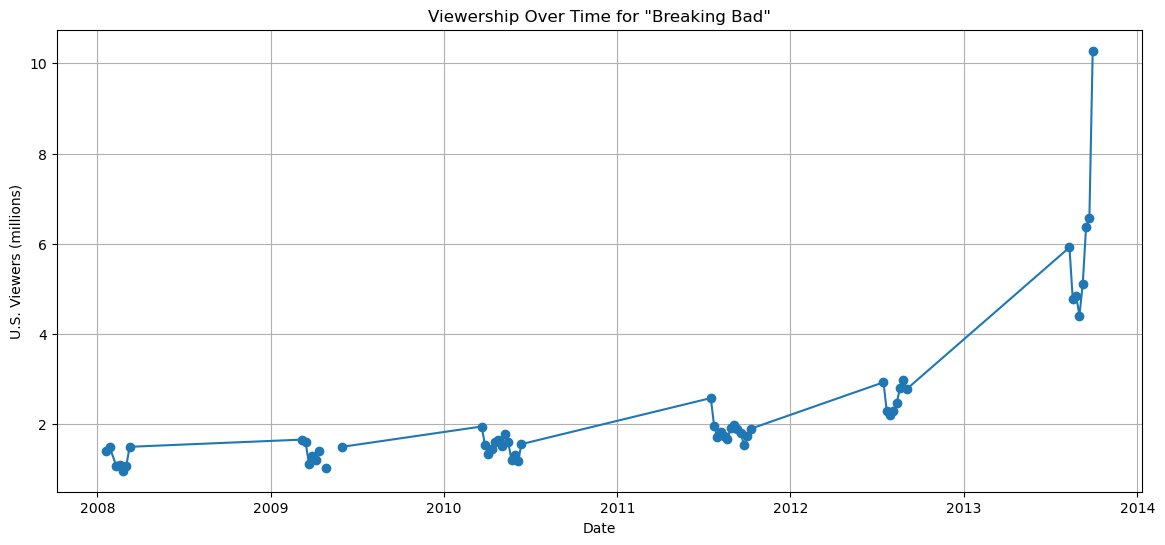

In [20]:
# Plotting the viewership over time
plt.figure(figsize=(14, 6))
plt.plot(breaking_bad_data['Date'], breaking_bad_data['U.S. viewers_million'], marker='o', linestyle='-')
plt.title('Viewership Over Time for "Breaking Bad"')
plt.xlabel('Date')
plt.ylabel('U.S. Viewers (millions)')
plt.grid(True)
plt.show()

In [19]:
rating_viewership_stats = breaking_bad_data[['Rating_IMDB', 'U.S. viewers_million']].describe()
rating_viewership_stats

,Rating_IMDB,U.S. viewers_million
count,62.000000,57.000000
mean,9.022581,2.324386
std,0.511962,1.719224
min,7.800000,0.970000
25%,8.700000,1.460000
50%,8.900000,1.710000
75%,9.450000,2.290000
max,10.000000,10.280000


In [6]:

season_summary = breaking_bad_data.groupby('Season').agg({
    'Date': ['first', 'last'],
    'Episode': 'count',
    'U.S. viewers_million': ['mean', 'first', 'last']
}).reset_index()


season_summary.columns = [
    'Season', 'First Aired Date', 'Last Aired Date', 'Episodes',
    'Avg. Viewers (millions)', 'First Aired Viewers (millions)', 'Last Aired Viewers (millions)'
]


season_summary['First Aired Date'] = season_summary['First Aired Date'].dt.strftime('%B %d, %Y')
season_summary['Last Aired Date'] = season_summary['Last Aired Date'].dt.strftime('%B %d, %Y')


summary_table = season_summary[['Season', 'Episodes', 'First Aired Date', 'First Aired Viewers (millions)',
                                'Last Aired Date', 'Last Aired Viewers (millions)', 'Avg. Viewers (millions)']]


summary_table


,Season,Episodes,First Aired Date,First Aired Viewers (millions),Last Aired Date,Last Aired Viewers (millions),Avg. Viewers (millions)
0,1,7,"January 20, 2008",1.41,"March 09, 2008",1.50,1.230000
1,2,13,"March 08, 2009",1.66,"May 31, 2009",1.50,1.355000
2,3,13,"March 21, 2010",1.95,"June 13, 2010",1.56,1.516923
3,4,13,"July 17, 2011",2.58,"October 09, 2011",1.90,1.866923
4,5,16,"July 15, 2012",2.93,"September 29, 2013",10.28,4.315625


Breaking Bad premiered on the same night as both the NFC and AFC Championships in the 2008 NFL playoffs, an intentional decision by AMC hoping to capture the adult male viewership immediately following the planned end of the NFC game. The game ran over its time slot, cutting into Breaking Bad's timeslot in most of America. As a result, the pilot had only about 1.4 million viewers. Coupled with the ongoing writers strike, the first season did not draw as large of a viewership as they expected. However, with subsequent seasons, viewership increased, avoiding the usual trend of downward viewership that most serialized shows had. Ratings further increased by the fourth season as, prior to airing, the previous seasons had been added to Netflix, boosting interest in the show. Breaking Bad is considered the first such show to have a renewed burst of interest due to the show being made available on Netflix. The second half of the final season saw record viewership, with the series finale reaching over 10.3 million viewers.